### Инструкция по выполнению проекта:

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

#### Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:

 -   /datasets/visits_info_short.csv. Скачать датасет
 -   /datasets/orders_info_short.csv. Скачать датасет
 -   /datasets/costs_info_short.csv. Скачать датасет
 
#### Шаг 2. Задайте функции для расчета и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

#### Шаг 3. Проведите исследовательский анализ данных

Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

Выясните:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

#### Шаг 4. Маркетинг
Выясните:

- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

#### Шаг 5. Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Подумайте, нужно ли включать в анализ органических пользователей?

#### Шаг 6. Напишите выводы
- Выделите причины неэффективности привлечения пользователей;
- Сформируйте рекомендации для отдела маркетинга для повышения эффективности.

#### Оформление: 
Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


#### Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Загрузка данных и подготовка их к анализу


Для работы с данными загружаем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
from datetime import datetime, timedelta, date

### Прочтение файлов и просмотр первых строк полученных таблиц

In [2]:
visits = pd.read_csv('~/Desktop/project_files/visits_info_short.csv')
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [3]:
orders = pd.read_csv('~/Desktop/project_files/orders_info_short.csv')
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [4]:
costs = pd.read_csv('~/Desktop/project_files/costs_info_short.csv')
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Изучение общей информация и обработка данных

#### Таблица "visits"

Посмотрим общую информацию.

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Пропусков нет, необходимо переименовать названия столбцов, а также столбцы с датами привести к нужному типу данных.

In [6]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Выше перепроверили свою работу, названия столбцов и тип данных изменились.

#### Таблица "orders"

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Здесь также нужно изменить названия столбцов и поменять тип данных в столбце.

In [10]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [11]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Перепроверяем:

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


#### Таблица "costs"

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проделываем такую же работу, как и с предыдущими таблицами.

In [14]:
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

In [15]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


### Проверка на дубликаты

In [17]:
print('Количество дубликатов:', visits.duplicated().sum())

Количество дубликатов: 0


In [18]:
print('Количество дубликатов:', orders.duplicated().sum())

Количество дубликатов: 0


In [19]:
print('Количество дубликатов:', costs.duplicated().sum())

Количество дубликатов: 0


## Функции для расчета и анализа LTV, ROI, удержания и конверсии


Ниже я создам функции(основные из теории) для последующих анализов

In [20]:
def get_profiles(sessions, orders):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # проверьте, есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    return profiles

In [21]:
def get_profiles_1(sessions, orders, events, ad_costs, event_names=[]):
    profiles_1 = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles_1['dt'] = profiles_1['first_ts'].dt.date
    profiles_1['month'] = profiles_1['first_ts'].astype('datetime64[M]')
    profiles_1['payer'] = profiles_1['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles_1[event] = profiles_1['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles_1.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles_1 = profiles_1.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles_1['acquisition_cost'] = profiles_1['acquisition_cost'].fillna(0)
    profiles_1 = profiles_1.query('channel != "organic"')
    return profiles_1

In [22]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],  # новый параметр dimensions
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # новый вариант с dimensions
    result_grouped = result_raw.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='user_id',
        aggfunc='nunique',
    )
    cohort_sizes = (
        result_raw.groupby(dimensions)  # заменили dt
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  # заменили dt
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [23]:
def get_conversion(
    profiles,
    purchases,  # заменили visits
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):

        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        result = result.fillna(0).cumsum(axis = 1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)

        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

In [24]:
def plot_retention(retention):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey = ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    plt.show()



In [25]:
def get_ltv_1(
    profiles_1,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles_1.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )


# функция для сглаживания датафрейма
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [26]:
# функция для визуализации LTV и ROI
def plot_ltv_roi_channel(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

events = None  # других событий нет

# разбиваем траты на рекламу по дням
min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

# получаем профили с CAC
users = get_profiles_1(visits, orders, events, daily_costs)

# считаем LTV и ROI с разбивкой по рекламным каналам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_1(
    users, orders, datetime(2019, 10, 27).date(), 14, dimensions=['channel']
)

In [27]:
def plot_ltv_roi_region(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

events = None  # других событий нет

# разбиваем траты на рекламу по дням
min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

# получаем профили с CAC
users = get_profiles_1(visits, orders, events, daily_costs)

# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_1(
    users, orders, datetime(2019, 10, 27).date(), 14, dimensions=['region']
)

In [28]:
def plot_ltv_roi_general(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

events = None  # других событий нет

# разбиваем траты на рекламу по дням
min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

# получаем профили с CAC
users = get_profiles_1(visits, orders, events, daily_costs)
# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_1(
    users, orders, datetime(2019, 10, 27).date(), 14
)

## Исследовательский анализ данных

Построение профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей.

Выяснить:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

### Построение профилей пользователей. Определение минимальной и максимальной даты привлечения пользователей

Вызовем функцию get_profiles()

In [29]:
profiles = get_profiles(visits, orders)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False
...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False


Теперь у нас есть профили пользователей, также имеется информация о платящих и неплатящих пользователях. Теперь определим минимальные и максимальные даты привлечения пользователей.

In [30]:
print('Минимальная дата привлечения пользователей:', datetime.date(profiles['first_ts'].min()))

Минимальная дата привлечения пользователей: 2019-05-01


In [31]:
print('Максимальная дата привлечения пользователей:', datetime.date(profiles['first_ts'].max()))

Максимальная дата привлечения пользователей: 2019-10-27


### Платящие пользователи с разбивкой по странам

In [32]:
(profiles
       .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
       .reset_index()
       .rename(columns={'count': 'пользователи', 'sum': 'платящие пользователи', 'mean': '% платящих пользователей'})
       .droplevel(1, axis=1)
       .sort_values(by='% платящих пользователей', ascending=False)
       .style.format({'% платящих пользователей': '{:.2%}'})
)

,region,пользователи,платящие пользователи,% платящих пользователей
3,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
0,France,17450,663,3.80%


Больше всего пользователей из США, а меньше всего из Германии. Также видно, что платящих пользователей больше всего из США, Франция в конце списка по доле платящих пользователей в процентах.

### Платящие пользователи с разбивкой по устройствам

Проделаем ту же работу с разбивкой по устройствам.

In [33]:
(profiles
       .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
       .reset_index()
       .rename(columns={'count': 'пользователи', 'sum': 'платящие пользователи', 'mean': '% платящих пользователей'})
       .droplevel(1, axis=1)
       .sort_values(by='% платящих пользователей', ascending=False)
       .style.format({'% платящих пользователей': '{:.2%}'})
)

,device,пользователи,платящие пользователи,% платящих пользователей
1,Mac,30042,1912,6.36%
3,iPhone,54479,3382,6.21%
0,Android,35032,2050,5.85%
2,PC,30455,1537,5.05%


Большинство пользователей заходит через устройство "iPhone", меньше всего через "Мас". Если рассматривать платящих пользователей, то здесь немного иная картина, на первом месте также "iPhone", а вот количество платящих пользователей "Мас" опережает "РС". Если рассматривать долю платящих пользователей, то здесь на первом месте "Мас", он немного опережает "iPhone", на последнем месте также остается "РС".

### Платящие пользователи с разбивкой по каналам привлечения

In [34]:
(profiles
       .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
       .reset_index()
       .rename(columns={'count': 'пользователи', 'sum': 'платящие пользователи', 'mean': '% платящих пользователей'})
       .droplevel(1, axis=1)
       .sort_values(by='% платящих пользователей', ascending=False)
       .style.format({'% платящих пользователей': '{:.2%}'})
)

,channel,пользователи,платящие пользователи,% платящих пользователей
1,FaceBoom,29144,3557,12.20%
0,AdNonSense,3880,440,11.34%
9,lambdaMediaAds,2149,225,10.47%
6,TipTop,19561,1878,9.60%
5,RocketSuperAds,4448,352,7.91%
7,WahooNetBanner,8553,453,5.30%
8,YRabbit,4312,165,3.83%
3,MediaTornado,4364,156,3.57%
2,LeapBob,8553,262,3.06%
4,OppleCreativeMedia,8605,233,2.71%


На первом месте у нас органические пользователи, далее лидирует "FaceBoom", а вот меньше всего пользователей приходит из "lambdaMediaAds". Если рассматривать платящих пользователей, то здесь лидирует "FaceBoom", а вот меньше всего "MediaTornado". Если рассматривать долю платящих, то здесь на последнем месте органические пользователи, а на первом также лидирует "FaceBoom".

Краткий вывод: Если рассматривать общее количество пользователей по всем трем показателям то лидируют пользователи со следующими характеристиками: США, "iPhone", "organic". Если рассматривать долю платящих: США, "Mac", "FaceBoom".   

## Маркетинг

Необходимо выяснить:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

### Общие затраты на рекламу

Для начала в таблицу с расходами добавим столбец с месяцами. Далее сделаем сводную таблицу общих трат по месяцам.

In [35]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [36]:
piv_cos = costs.pivot_table(index = 'month', values = 'costs', 
                      aggfunc = 'sum').sort_values(by='costs', ascending=False)
piv_cos

,costs
month,
2019-09-01,22441.340
2019-10-01,20882.415
2019-08-01,20657.870
2019-07-01,16447.060
2019-06-01,15090.045
2019-05-01,9978.570


Больше всего компания затратила на рекламу в сентябре месяце. А вот минимальные траты за исследуемый период в мае месяце. Ниже график отображает данные показатели.

In [37]:
print('Общее количество затрат на рекламу за весь период:', piv_cos['costs'].sum())

Общее количество затрат на рекламу за весь период: 105497.29999999999


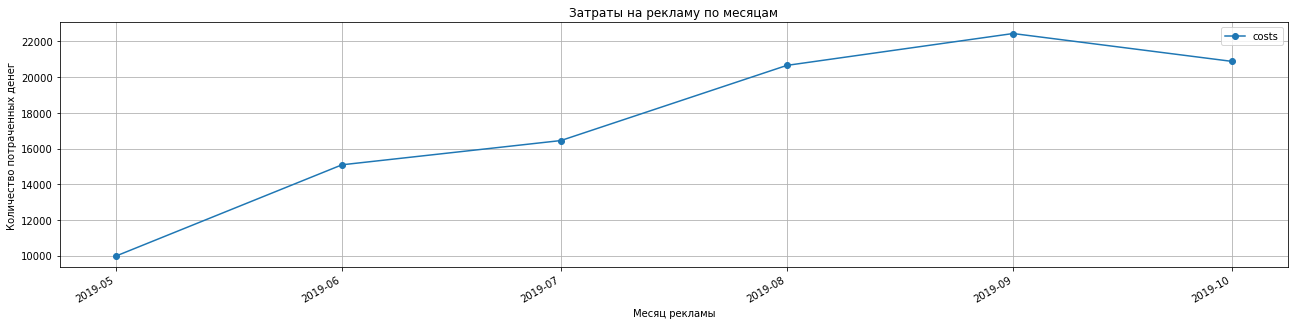

In [38]:
piv_cos.plot(y='costs', grid=True, style='o-', figsize=(22, 5))
plt.title('Затраты на рекламу по месяцам')
plt.xlabel('Месяц рекламы')
plt.ylabel('Количество потраченных денег')
plt.show()

### Затраты на рекламу с разбивкой по каналам привлечения

Создадим сводную таблицу с разбивкой по каналам привлечения.

In [39]:
costs.pivot_table(index = 'channel', columns = 'month', values = 'costs', 
                      aggfunc = 'sum')

month,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01
channel,,,,,,
AdNonSense,1169.70,538.650,504.00,579.60,581.70,537.600
FaceBoom,3524.40,5501.100,5294.30,6274.40,6114.90,5736.500
LeapBob,140.28,314.580,313.53,369.81,343.98,315.420
MediaTornado,238.56,138.000,138.48,154.56,144.72,140.160
OppleCreativeMedia,169.75,370.000,366.50,439.25,427.75,378.000
RocketSuperAds,577.98,325.715,252.07,253.11,218.40,205.725
TipTop,2981.00,6675.600,8410.20,11202.00,13232.50,12250.000
WahooNetBanner,418.80,921.000,851.40,1040.40,977.40,942.000
YRabbit,299.70,106.200,97.38,124.74,152.79,163.410


Здесь очевидно, что компания больше всего денег вложила на рекламу по двум каналам: FaceBoom и TipTop, минимальные траты приходятся на каналы: MediaTornado и YRabbit.

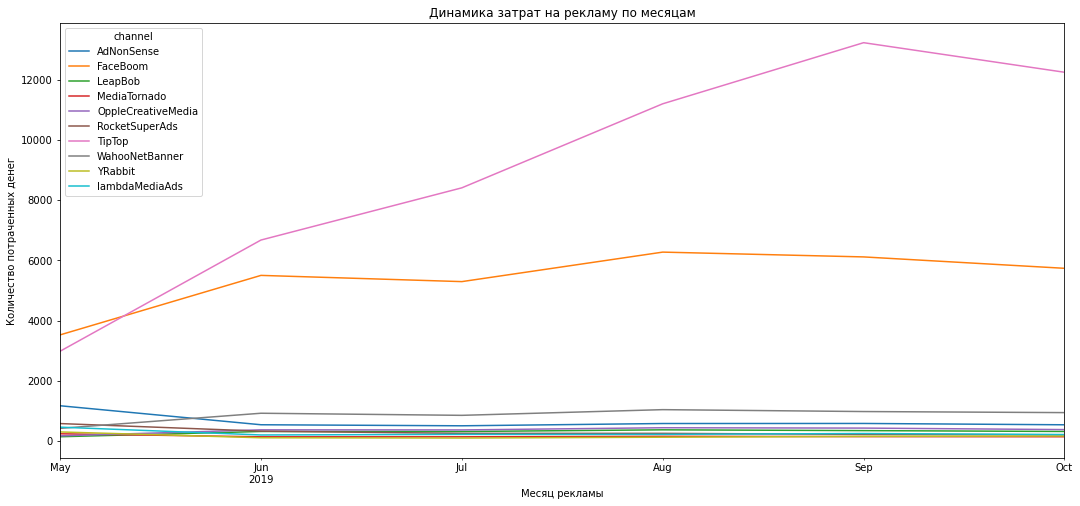

In [40]:
costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', 
                      aggfunc = 'sum').plot()
plt.title('Динамика затрат на рекламу по месяцам')
plt.xlabel('Месяц рекламы')
plt.ylabel('Количество потраченных денег')
plt.show()

In [41]:
costs['day'] = costs['dt'].astype('datetime64[D]')

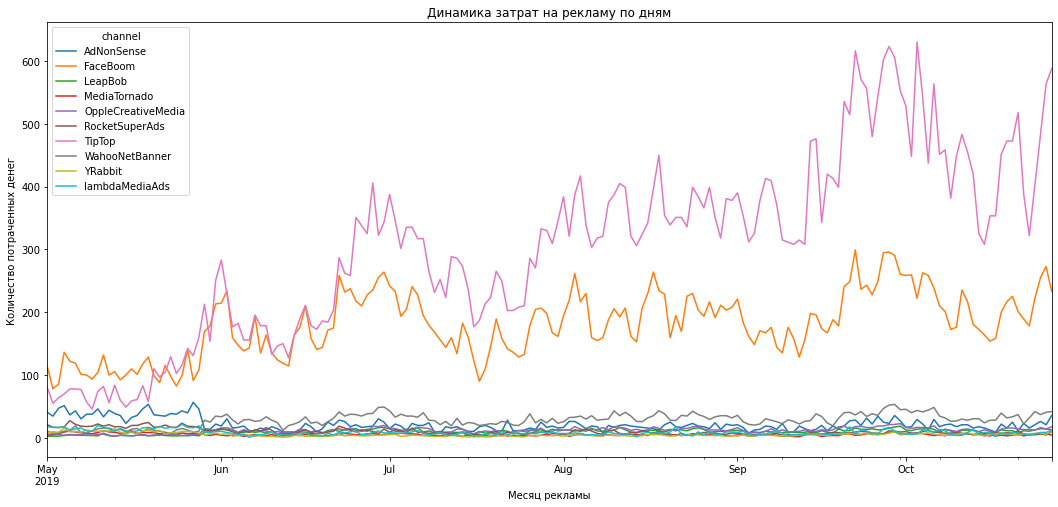

In [42]:
costs.pivot_table(index = 'day', columns = 'channel', values = 'costs', 
                      aggfunc = 'sum').plot()
plt.title('Динамика затрат на рекламу по дням')
plt.xlabel('Месяц рекламы')
plt.ylabel('Количество потраченных денег')
plt.show()

Также добавила дополнительные графики (динамику затрат по месяцам и по дням), которые отображают, что компания основные рекламные деньги вложила в 2 канала привлечения: FaceBoom и TipTop

### Рассчет стоимости привлечения одного пользователя из каждого источника

До этого мы использовали таблицу profiles, сейчас мы вызовем функцию profiles_1, так как в ней как раз имеются все необходимые рассчеты САС.

In [43]:
events = None
profiles_1 = get_profiles_1(visits, orders, events, daily_costs)
profiles_1

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


In [44]:
channel_cac = (profiles_1
       .pivot_table(index='channel', values='acquisition_cost', aggfunc=['mean'])
       .reset_index()
       .rename(columns={'mean': 'cac'})
       .droplevel(1, axis=1)
       .sort_values(by='cac', ascending=False)
       
)
channel_cac

,channel,cac
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


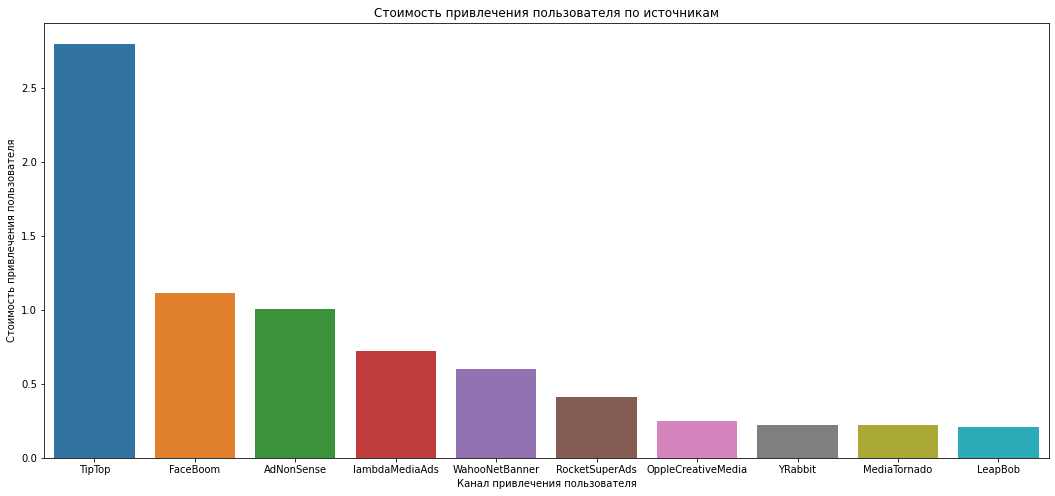

In [45]:
sns.barplot(x='channel', y='cac', data = channel_cac) 
plt.title('Стоимость привлечения пользователя по источникам')
plt.xlabel('Канал привлечения пользователя')
plt.ylabel('Стоимость привлечения пользователя')
plt.show()

Визуализируем для наглядности. Исходя из каналов привлечения, самый высокий САС у TipTop, минимальный: LeapBob

In [46]:
(profiles_1
       .pivot_table(index='channel', values='acquisition_cost', aggfunc=['sum'])
       .reset_index()
       .rename(columns={'sum': 'общее количество затраченных средств'})
       .droplevel(1, axis=1)
       .sort_values(by='общее количество затраченных средств', ascending=False)
       
)

,channel,общее количество затраченных средств
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


Также посмотрели общее количество затраченных средств на рекламу.

Теперь рассчитаем САС для всего проекта.

In [47]:
cost = profiles_1['acquisition_cost'].sum()
client = len(profiles_1.query('channel != "organic"')['user_id'].unique())
all_cac = cost / client
all_cac

1.1274813239427588

Если рассматривать стоимость привлечения одного пользователя всего проекта, то она составляет 1,127 у.е.


## Оценка окупаемости рекламы для привлечения пользователей

Ранее мы задавали функции, теперь применим их для рассчетов

### Общая окупаемость рекламы

Для начала определим момент анализа и горизонт

In [48]:
observation_date = datetime(2019, 10, 27).date()
horizon_days = 14

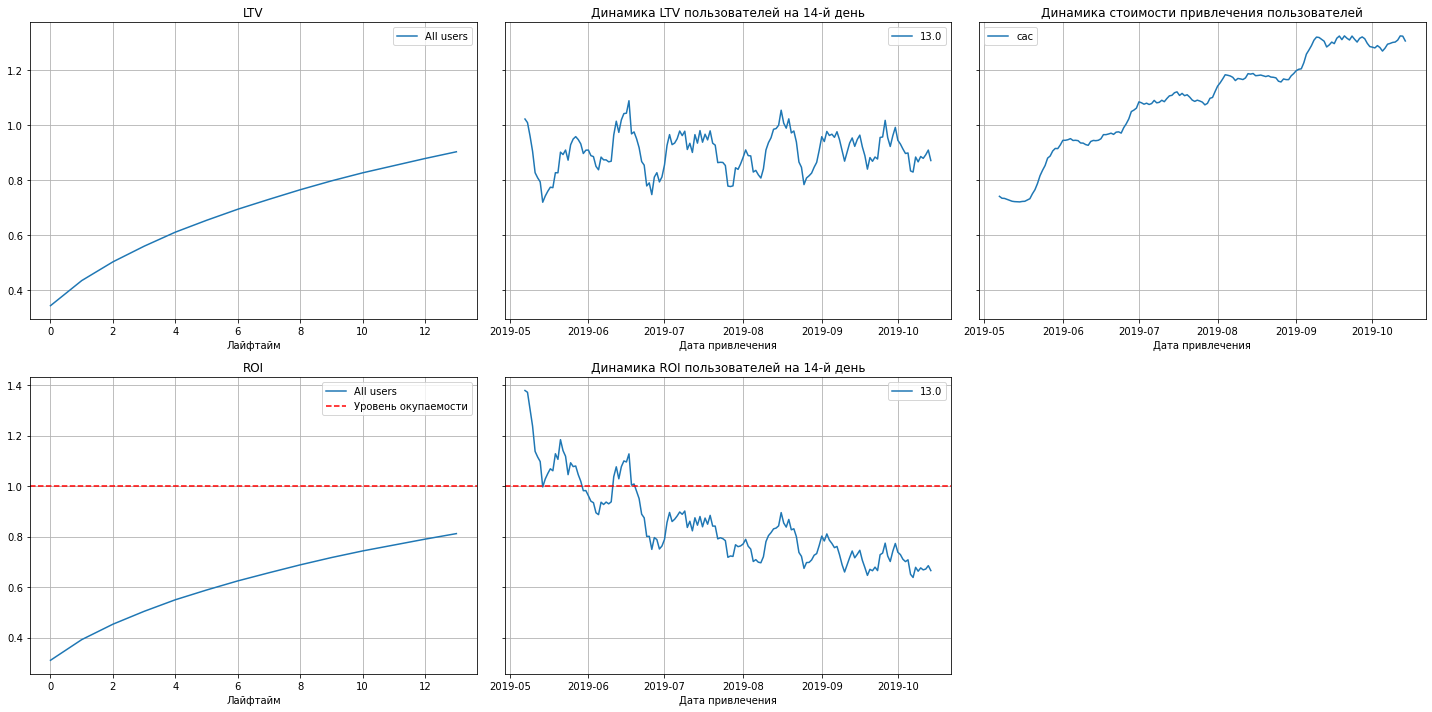

In [49]:
plot_ltv_roi_general(
    ltv, ltv_history, roi, roi_history, 14, window=7
)

Если рассмотреть графики выше, то видно, что стоимость привлечения пользователей растет с мая месяца, при этом данные пользователи не окупаются. Это говорит о том, что деньги, вложенные в рекламы, не приносят прибыли и нужное количество платящих пользователей.

### Окупаемость рекламы с разбивкой по каналам привлечения

In [50]:
def plot_ltv_roi_channel(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

events = None  # других событий нет

# разбиваем траты на рекламу по дням
min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

# получаем профили с CAC
users = get_profiles_1(visits, orders, events, daily_costs)

# считаем LTV и ROI с разбивкой по рекламным каналам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_1(
    users, orders, datetime(2019, 10, 27).date(), 14, dimensions=['channel']
)

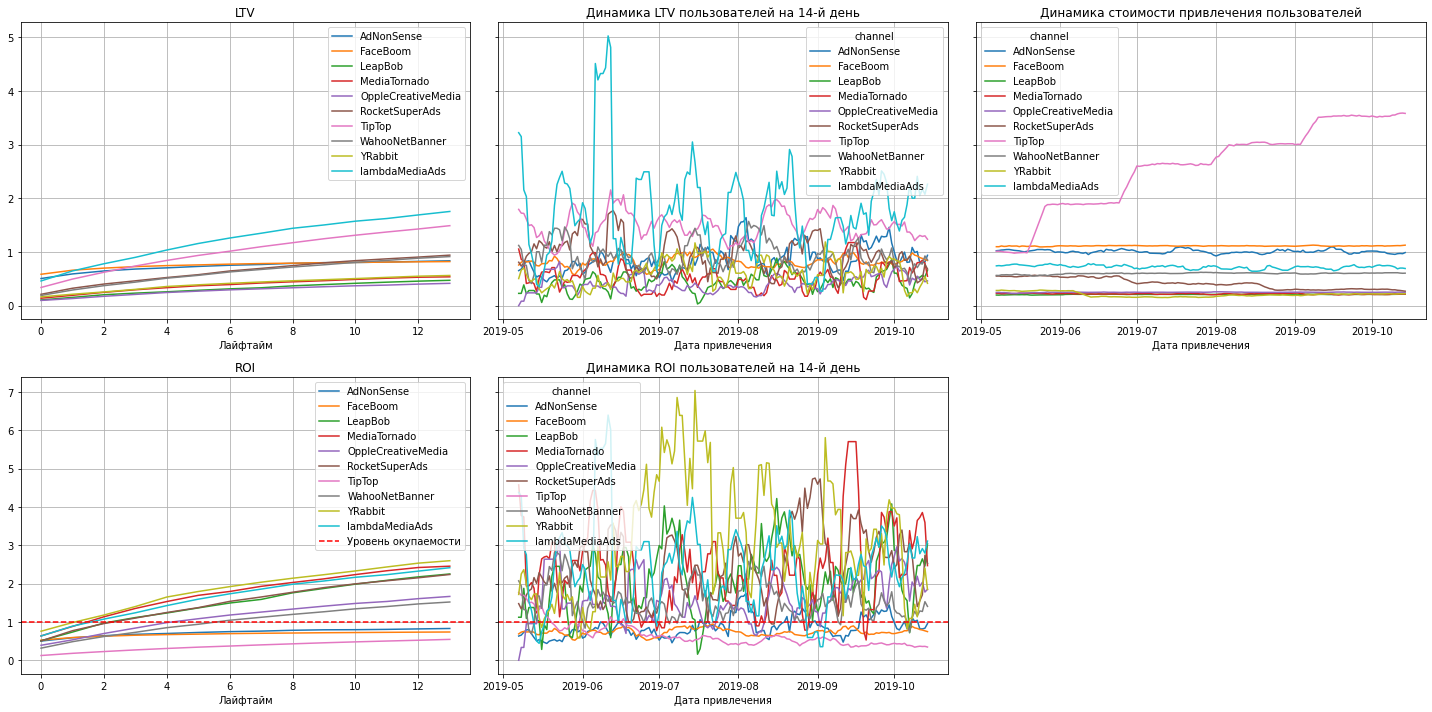

In [51]:
plot_ltv_roi_channel(
    ltv, ltv_history, roi, roi_history, 14, window=7
)

На данных графиках видно, что каналы привлечения: "FaceBoom", "TipTop" и "AdNonSense" не окупаются. Стоимость привлечения из   канала "TipTop" самая высокая. А вот лидер по LTV = "lambdaMediaAds", хотя компания тратит на рекламу по данному каналу одни из самых минимальных. Если рассматривать с точки зрения окупаемости - то это канал "YRabbit", хотя на рекламу по данному каналу привлечения потрачено меньше всего денежных средств. "lambdaMediaAds" также находится в лидерах по окпаемости. "YRabbit" также имеет высокую динамику окупаемости.

### Окупаемость рекламы с разбивкой по странам

In [52]:
def plot_ltv_roi_region(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

events = None  # других событий нет

# разбиваем траты на рекламу по дням
min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
for index, values in costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

# получаем профили с CAC
users = get_profiles_1(visits, orders, events, daily_costs)

# считаем LTV и ROI с разбивкой по странам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv_1(
    users, orders, datetime(2019, 10, 27).date(), 14, dimensions=['region']
)

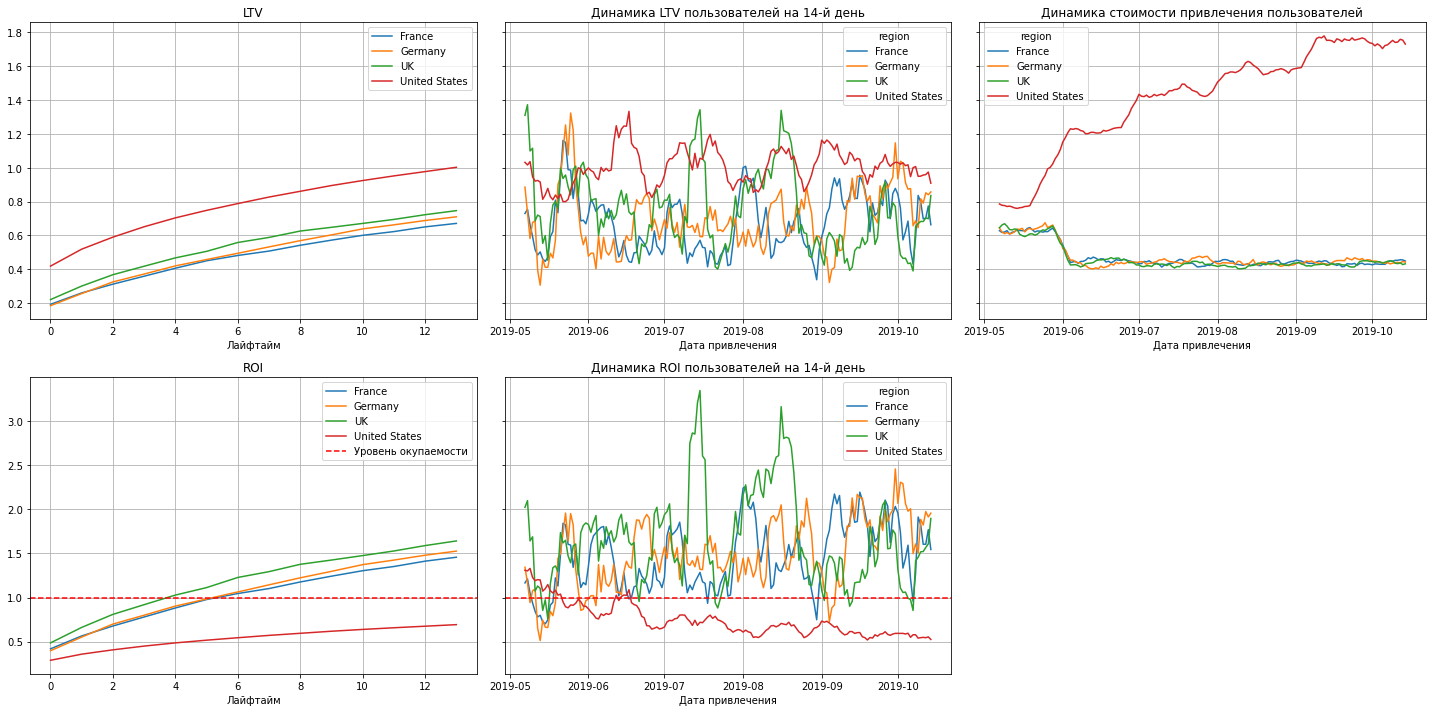

In [53]:
plot_ltv_roi_region(
    ltv, ltv_history, roi, roi_history, 14, window=7
)

Если рассматривать графики с разбивкой по странам, то тут появляется некая аномалия. Когда мы рассчитывали общее количество пользователей и долю платящих пользователей с разбивкой по странам, то у нас в лидерах была США, а здесь на графике ROI четко видно, что США пользователи из США не окупаются. Если рассматривать стоимость привлечения пользователя из США, то он имеет самые высокие показатели. При этом, показатель LTV(пожизненной ценности клиента) у Америки выше других стран. Чтобы разобраться в причинах данной аномалии, сделаем сводную таблицу и поссмотрим, из каких каналов привлечения приходят пользователи США.

In [54]:
visits.pivot_table(index = 'channel', columns = 'region', values = 'user_id', 
                      aggfunc = 'count')

region,France,Germany,UK,United States
channel,,,,
AdNonSense,2381.0,2183.0,2327.0,NaN
FaceBoom,NaN,NaN,NaN,49022.0
LeapBob,5869.0,4892.0,6252.0,NaN
MediaTornado,NaN,NaN,NaN,8878.0
OppleCreativeMedia,5808.0,4865.0,6121.0,NaN
RocketSuperAds,NaN,NaN,NaN,12724.0
TipTop,NaN,NaN,NaN,54794.0
WahooNetBanner,7033.0,6324.0,7108.0,NaN
YRabbit,NaN,NaN,NaN,9053.0


А вот и ответ! Компания вкладывает самые большие рекламные ресурсы в FaceBoom и TipTop, при этом, вспоминая предыдущие рассчеты, мы выяснили, что реклама на данных каналах привлечения не окупается. Также у США самое большое количество органических пользователей. По ROI самые высокие показатели у Великобритании, на данные показатели в том числе влияет то, что в предыдущих графиках с разбивкой по каналам привлечения, то лидер по LTV = "lambdaMediaAds", канал привлечения LeapBob также имеет высокие показатели по окупаемости. 

## Графики конверсии и удержания

Теперь мы построим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам и поссмотрим на результаты

### Графики конверсии и удержания с разбивкой по странам

Начнем с разбивки по регионам.

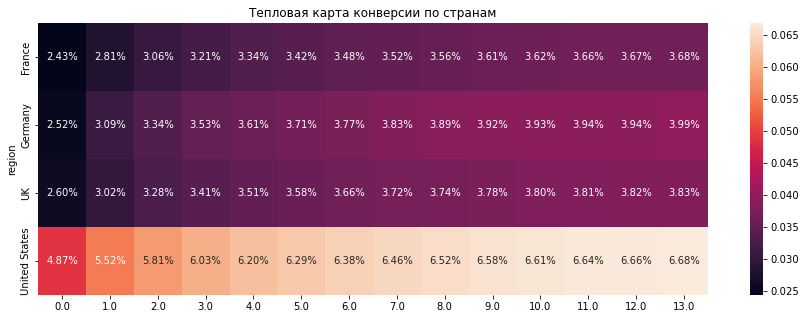

In [55]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 10, 27).date(), 14, dimensions=['region']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по странам')
plt.show()

Если рассматривать тепловую карту конверсии по странам, то здесь в лидерах как и следовало ожидать США. Так как доля платящих пользователей в США выше, чем в других странах. Конверсии в других странам практически одинаковы, я бы выделила Германию, к 14 дню ее конверсия составляет 3,99 %, минимальные показатели у Франции - 3,68 %. С одной стороны, США по всем показателям лидирует, но исходя из трат на рекламу, данный сегмент рынка не окупается. Поэтому необходимо перессмотреть политику в данном направлении, возможно рассмотреть иные каналы привлечения, так как рынок покупателей в США огромен.

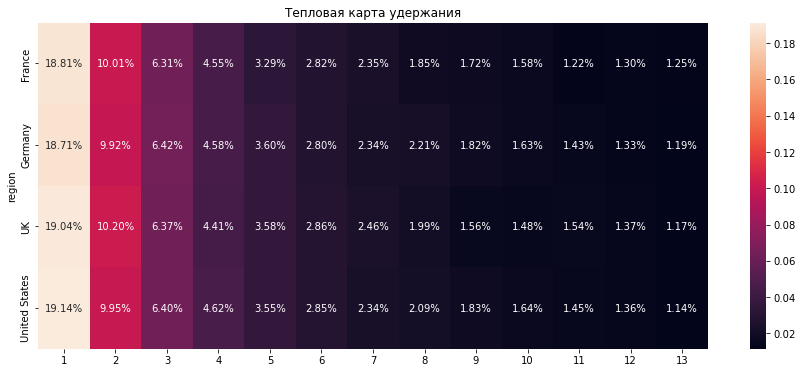

In [56]:
retention_raw, retention = get_retention(
    profiles, visits, datetime(2019, 10, 27).date(), 14, dimensions=['region']
)

plt.figure(figsize=(15, 6))
sns.heatmap(retention.drop(columns=['cohort_size', 0]), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания')
plt.show()

Если рассматривать тепловую карту удержания, то здесь все с точностью наоборот, в лидерах Франция - 1,25 %, а самые низкие показатели имеет США - 1,14 %.

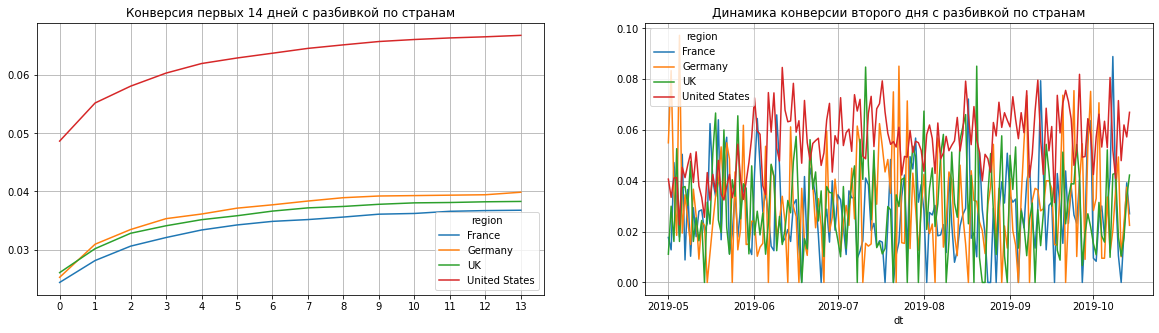

In [57]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 10, 27).date(), 14, dimensions=['region']
)

plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия первых 14 дней с разбивкой по странам')

# для графика истории изменений 
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt', columns='region', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(
    # во второй ячейке строим график истории изменений
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика конверсии второго дня с разбивкой по странам')

plt.show() 


Все 4 страны, с точки срения рынка потенциальных покупателей, выглядят перспективными, я предполагаю, что основная проблема заключается в некорректном распределении рекламных ресурсов.

### Кривая удержания с разбивкой по совершению покупок

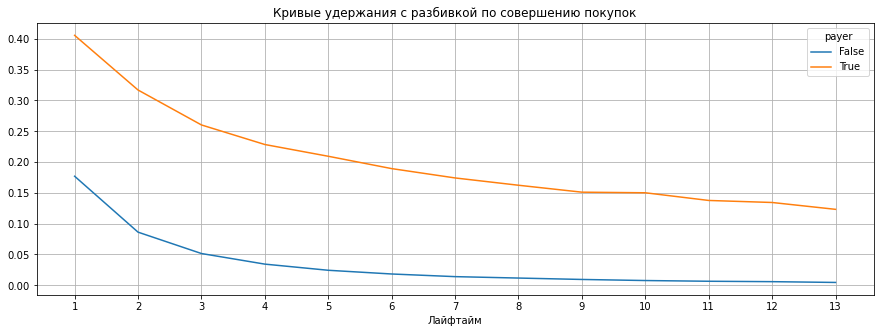

In [58]:
retention_raw, retention = get_retention(
    profiles, visits, datetime(2019, 10, 27).date(), 14, dimensions=['payer']
)
report = retention.drop(columns=['cohort_size', 0])
report.T.plot(grid=True, xticks=list(report.columns.values), figsize=(15, 5))
plt.xlabel('Лайфтайм')
plt.title('Кривые удержания с разбивкой по совершению покупок')
plt.show()

График выглядит логично, платящие пользователи удерживаются дольше.

### Графики конверсии и удержания с разбивкой по устройствам

Теперь построим тепловую карту конверсии с разбивкой по устройствам.

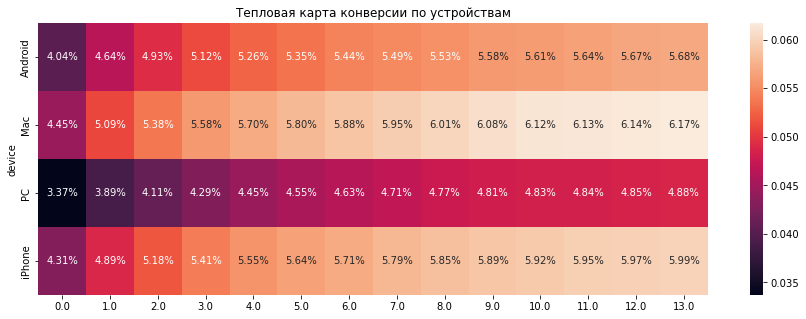

In [59]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 10, 27).date(), 14, dimensions=['device']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show()

Тут, как и ожидали лидирующие показатели у устройства Мас, конверсия на 14 день составляет 6,17 %, самые низкие показатели у РС - 4,88 %. Показатели у устройства Айфон на втором месте после Мас, кончерсия на 14 день составляет - 5,99 %.

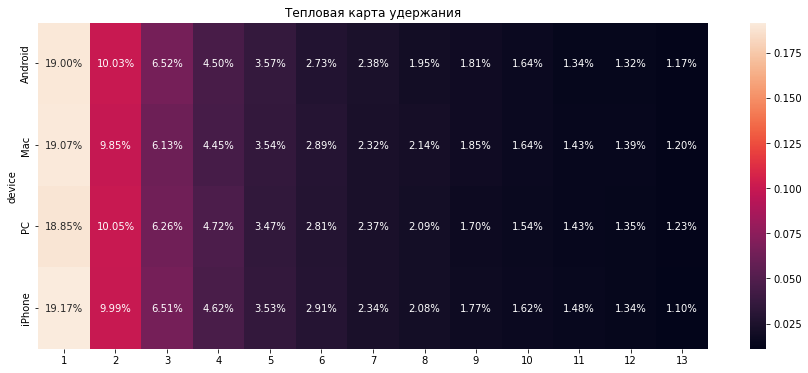

In [60]:
retention_raw, retention = get_retention(
    profiles, visits, datetime(2019, 10, 27).date(), 14, dimensions=['device']
)

plt.figure(figsize=(15, 6))
sns.heatmap(retention.drop(columns=['cohort_size', 0]), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания')
plt.show()

По карте удержания хорошие показатели по сравнению с другими странами имеют Мас и РС (1,20 % и 1,23 % соответсвенно), на последнем месте Айфон - 1,10 % на 14 день.

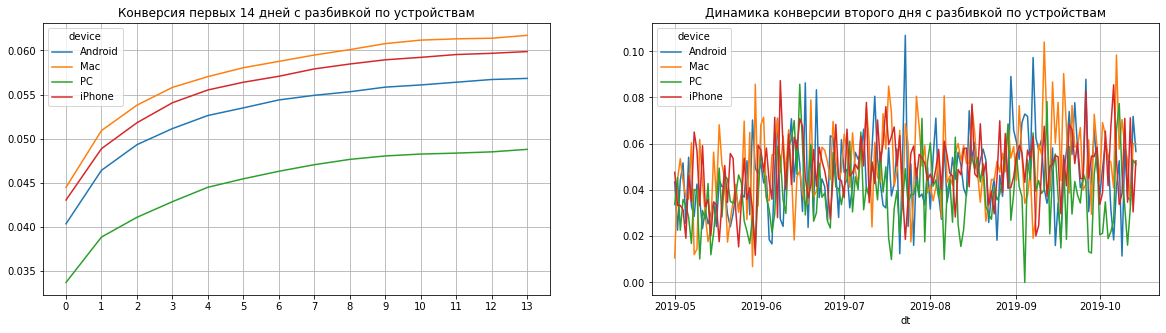

In [61]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 10, 27).date(), 14, dimensions=['device']
)

plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия первых 14 дней с разбивкой по устройствам')

# для графика истории изменений 
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt', columns='device', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(
    # во второй ячейке строим график истории изменений
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика конверсии второго дня с разбивкой по устройствам')

plt.show() 

Динамика конверсии также выглядит логично, в лидерах по конверсии Мас, рядом устройства Айфон, а вот минимальные показатели у РС. Разработчикам приложения следует внимательно рассмотреть как приложение адаптировано под РС, возможно там возникают какие-либо ошибки или неудобства при оформлении заказа.

### Графики конверсии и удержания с разбивкой по каналам привлечения

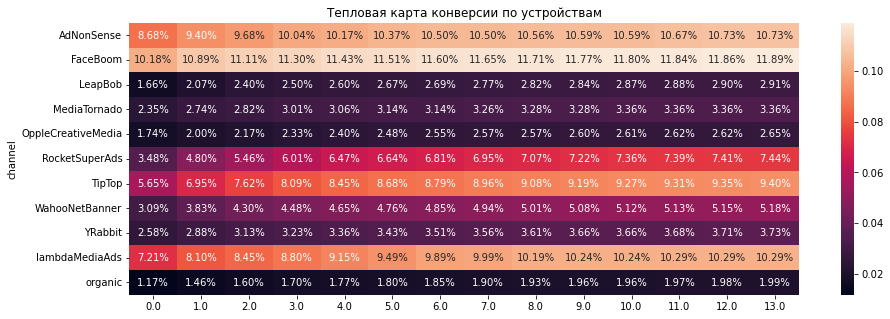

In [62]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 10, 27).date(), 14, dimensions=['channel']
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5))
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии по устройствам')
plt.show()

Конверсия по каналам привлечения: тройка лидеров на 14 день: FaceBoom - 11,89 %; AdNonSense - 10,73 %; LambdaMediaAds - 10,29 %, самые низкие показатели: OppleCreativeMedia - 2,65 %; LeapBob - 2,91 %; MediaTormado - 3,36 %. также хочу обратить внимание на органические пользователи, конверсия составляет 1,99 %, я их не учитывала в тройке самых низких показателей, так как в рекламу компания не вкладывается и поэтому для рассчетов это не нужно.

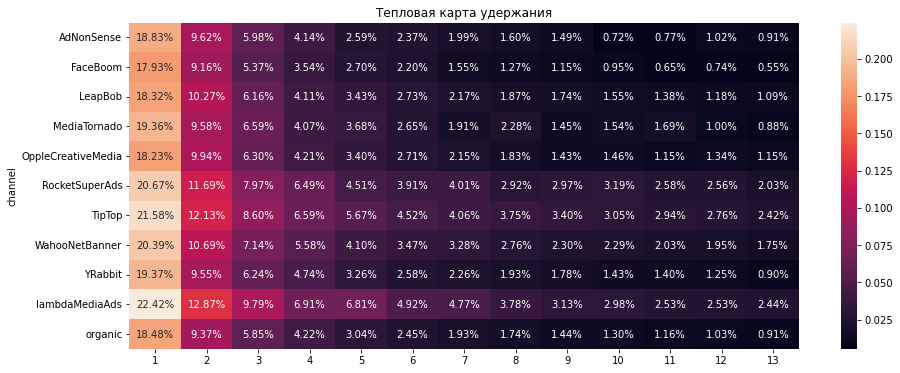

In [63]:
retention_raw, retention = get_retention(
    profiles, visits, datetime(2019, 10, 27).date(), 14, dimensions=['channel']
)

plt.figure(figsize=(15, 6))
sns.heatmap(retention.drop(columns=['cohort_size', 0]), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания')
plt.show()

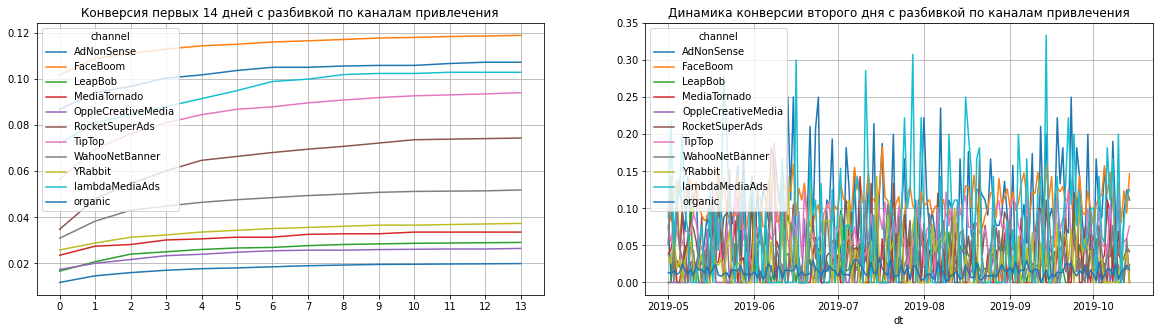

In [64]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, datetime(2019, 10, 27).date(), 14, dimensions=['channel']
)

plt.figure(figsize=(20, 5)) # размер сетки для графиков

# для кривых конверсии исключаем размеры когорт
report = conversion.drop(columns=['cohort_size'])
report.T.plot(
    # строим кривые конверсии в первой ячейке таблицы графиков
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 1)
)
plt.title('Конверсия первых 14 дней с разбивкой по каналам привлечения')

# для графика истории изменений 
# преобразуем таблицу динамики конверсии
report = (
    conversion_history[1]
    .reset_index()
    .pivot_table(index='dt', columns='channel', values=1, aggfunc='mean')
    .fillna(0)  # заполняем пропуски на случай, если они возникнут
)
report.plot(
    # во второй ячейке строим график истории изменений
    grid=True, ax=plt.subplot(1, 2, 2)
)
plt.title('Динамика конверсии второго дня с разбивкой по каналам привлечения')

plt.show() 

Если рассматривать динамику конверсии, я бы выделила LambdaMediaAds, считаю одним из самых перспективных каналов привлечения, омеет хорошие результаты по основным показателям.

После проведенного анализа есть определенная картина и можно сделать необходимые рекомендации отделу маркетинга.


## Выводы и основные рекомендации бизнесу


Мы провели исследовательский анализ развлекательного приложения Procrastinate Pro+. Для исследования нам были предоставлены 3 таблицы с данными: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы. Перед тем, как начать анализ данных, мы сделали первичную обработку данных: переименовали столбцы для удобства, во всех таблицах столбцы, хранящих даты, изменили тип данных, также проверили на наличие дубликатов. После этого мы написали функции для дальнейших рассчетов. Далее, мы создали профили пользователей, определили минимальную и максимальную даты привлечения пользователей (01.05.2019 и 27.10.2019 соответсвенно). 

Вместе с тем, мы поссмотрели общее количество пользователей, количесвто платящих пользователей и их доля за весь период, с разбивкой по странам, устройствам и каналам привлечения:

по странам (общее количество/только платящие пользователи/ доля платящих пользователей):

United States-100002/6902/0.069

UK-17575/700/0.04

France-17450/663/0.038

Germany-14981/616/0.041


по устройствам (общее количество/только платящие пользователи/ доля платящих пользователей):

iPhone-54479/3382/0.062

Android-35032/2050/0.059

PC-30455/1537/0.05

Mac-30042/1912/0.064


по каналам привлечения (общее количество/только платящие пользователи/ доля платящих пользователей):

organic-56439/1160/0.021

FaceBoom-29144/3557/0.122

TipTop-19561/1878/0.096

OppleCreativeMedia-8605/233/0.027

LeapBob-8553/262/0.031

WahooNetBanner-8553/453/0.053

RocketSuperAds-4448/352/0.079

MediaTornado-4364/156/0.036

YRabbit-4312/165/0.038

AdNonSense-3880/440/0.113

lambdaMediaAds-2149/225/0.105

Промежуточные выводы по вышеуказанным показателям:
1. Больше всего пользователей из США, а меньше всего из Германии. Лидер по платящим пользователям - США.
2. Большинство пользователей заходит через устройство "iPhone", меньше всего через "Мас". Если рассматривать долю платящих пользователей, то на первом месте "Мас", он немного опережает "iPhone", на последнем месте "РС".
3. На первом месте у нас органические пользователи, далее лидирует "FaceBoom", а вот меньше всего пользователей приходит из "lambdaMediaAds". Если рассматривать долю платящих, то здесь на последнем месте органические пользователи, а на первом также лидирует "FaceBoom".

Если рассматривать общее количество пользователей по всем трем показателям то лидируют пользователи со следующими характеристиками: США, "iPhone", "organic". Если рассматривать долю платящих: США, "Mac", "FaceBoom".


Далее, мы подсчитали общее количесвто расходов на рекламу по месяцам:
	
сентябрь-22441.3
октябрь-20882.4
август-20657.9
июль-16447.1
июнь-15090.1
май-9978.6

Самые большие затраты на рекламы были в сентябре, меньше всего в мае.

После чего, мы рассчитали затраты на рекламу с разбивкой по каналам привлечения. Компания больше всего денег вложила на рекламу по двум каналам: FaceBoom и TipTop, минимальные траты приходятся на каналы: MediaTornado и YRabbit. Исходя из каналов привлечения, самый высокий САС у TipTop, минимальный: LeapBob. Если рассматривать стоимость привлечения одного пользователя всего проекта, то она составляет 1,127 у.е.

Мы также построили графики, отображающие общую окупаемость рекламы и обнаружили, что стоимость привлечения пользователей растет с мая месяца, при этом данные пользователи не окупаются. Это говорит о том, что деньги, вложенные в рекламы, не приносят прибыли и нужное количество платящих пользователей.

Мы построили графики и поссмотрели окупаемость с разбивкой по каналам привлечения. На гафиках было видно, что каналы привлечения: "FaceBoom", "TipTop" и "AdNonSense" не окупаются. Стоимость привлечения из  канала "TipTop" самая высокая. А вот лидер по LTV = "lambdaMediaAds", хотя компания тратит на рекламу по данному каналу одни из самых минимальных. Если рассматривать с точки зрения окупаемости - то это канал "YRabbit", хотя на рекламу по данному каналу привлечения потрачено меньше всего денежных средств. "lambdaMediaAds" также находится в лидерах по окпаемости. "YRabbit" также имеет высокую динамику окупаемости.

Если рассматривать графики с разбивкой по странам, то там появляется некая аномалия. Когда мы рассчитывали общее количество пользователей и долю платящих пользователей с разбивкой по странам, то у нас в лидерах была США, а здесь на графике ROI четко видно, что США пользователи из США не окупаются. Если рассматривать стоимость привлечения пользователя из США, то он имеет самые высокие показатели. При этом, показатель LTV(пожизненной ценности клиента) у Америки выше других стран. Чтобы разобраться в причинах данной аномалии, мы дополнительно поссмотрели, из каких каналов привлечения приходят пользователи США.

Поссмотрев каналы привлечения США, мы обнаружили, что компания вкладывает самые большие рекламные ресурсы в FaceBoom и TipTop, при этом, вспоминая предыдущие рассчеты, мы выяснили, что реклама на данных каналах привлечения не окупается. Также у США самое большое количество органических пользователей. По ROI самые высокие показатели у Великобритании, на данные показатели в том числе влияет то, что в предыдущих графиках с разбивкой по каналам привлечения, то лидер по LTV = "lambdaMediaAds", канал привлечения LeapBob также имеет высокие показатели по окупаемости.

После этого, мы построили графики конверсии и удержания с разбивкой по устройствам, странам, каналам привлечения, краткие выводы по данным показателям:
1. Исходя из конверсии по странам, то здесь в лидерах как и следовало ожидать США. Так как доля платящих пользователей в США выше, чем в других странах. Конверсии в других странам практически одинаковы, я бы выделила Германию, к 14 дню ее конверсия составляет 3,99 %, минимальные показатели у Франции - 3,68 %. С одной стороны, США по всем показателям лидирует, но исходя из трат на рекламу, данный сегмент рынка не окупается. Поэтому необходимо перессмотреть политику в данном направлении, возможно рассмотреть иные каналы привлечения, так как рынок покупателей в США огромен. Все 4 страны, с точки срения рынка потенциальных покупателей, выглядят перспективными, я предполагаю, что основная проблема заключается в некорректном распределении рекламных ресурсов.
2. Лидирующие показатели у устройства Мас, конверсия на 14 день составляет 6,17 %, самые низкие показатели у РС - 4,88 %. Показатели у устройства Айфон на втором месте после Мас, кончерсия на 14 день составляет - 5,99 %. По карте удержания хорошие показатели по сравнению с другими странами имеют Мас и РС (1,20 % и 1,23 % соответсвенно), на последнем месте Айфон - 1,10 % на 14 день. Динамика конверсии также выглядит логично, в лидерах по конверсии Мас, рядом устройства Айфон, а вот минимальные показатели у РС. Разработчикам приложения следует внимательно рассмотреть как приложение адаптировано под РС, возможно там возникают какие-либо ошибки или неудобства при оформлении заказа.
3. Конверсия по каналам привлечения: тройка лидеров на 14 день: FaceBoom - 11,89 %; AdNonSense - 10,73 %; LambdaMediaAds - 10,29 %, самые низкие показатели: OppleCreativeMedia - 2,65 %; LeapBob - 2,91 %; MediaTormado - 3,36 %. также хочу обратить внимание на органические пользователи, конверсия составляет 1,99 %, я их не учитывала в тройке самых низких показателей, так как в рекламу компания не вкладывается и поэтому для рассчетов это не нужно. Если рассматривать динамику конверсии, я бы выделила LambdaMediaAds, считаю одним из самых перспективных каналов привлечения, омеет хорошие результаты по основным показателям.

Рекомендации и предложения бизнесу:
1. Перессмотреть распределение рекламных средств, обратить внимание на другие каналы привлечения: LambdaMediaAds, AdNonSense, LeapBob, YRabbit. Сократить расходы на рекламу по каналам привлечения FaceBoom и TipTop.
2. Так как в разных странах разные каналы привлечения, рассмотреть возможность вложения рекламных денег в разные каналы привлечения, с точки зрения Региона, то есть, например, в США рассмотреть вышеперечисленные каналы привлечения.
3. Обратить внимание на работу приложения на устройстве РС, возможно там возникают какие-либо ошибки или неудобства при оформлении заказа.
